In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
class MyRegression:
    def __init__(self):
        self.coef = None
        self.intercept = None

    def fit(self,X_train,y_train):
        X_train = X_train.values
        y_train = y_train.values
        X_mean = X_train.mean()
        y_mean = y_train.mean()
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (y_train[i] - y_mean) * (X_train[i] - X_mean)
            den += (X_train[i] - X_mean) * (X_train[i] - X_mean)

        self.coef = num/den
        self.intercept = y_mean - (self.coef * X_mean)

    def predict(self,X_test):
        return self.coef*X_test + self.intercept

    def r2_score(self,y_test,y_pred):
        y_test = y_test.values
        y_pred = y_pred.values
        y_mean = y_test.mean()
        num = 0
        den = 0
        for i in range(y_test.shape[0]):
            num += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
            den += (y_test[i] - y_mean) * (y_test[i] - y_mean)
        return  1 - (num/den)

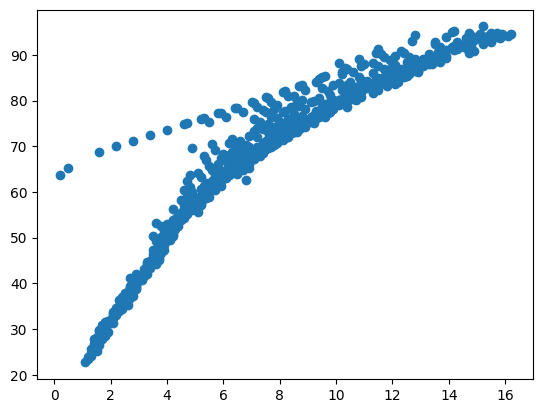

In [9]:
df = pd.read_csv('hours_studied.csv')
df.head()
plt.scatter(df['hours_studied'],df['marks'])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df['hours_studied'],df['marks'],test_size=.2,random_state=42)
lr = MyRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.r2_score(y_test,y_pred)

np.float64(0.8225341699644452)

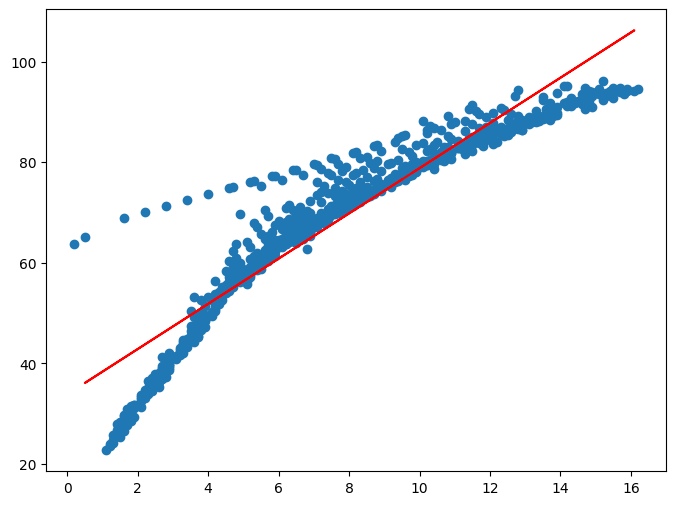

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['hours_studied'],df['marks'])
plt.plot(X_test,y_pred,color='r')